In [1]:
%load_ext autoreload
%autoreload 2


This code tests the phase space method for finding eigenstates of translationally symmetric systems. 

It does this by first calculating the energies of a translationally symmetric larger system and then finding the energies in k-space of a smaller system.

If the method is correct, these energies should be identical. A plot of the DOS is given for each system. 

Finally we show the difference between the energies, the last graph should always just be 0 + machine noise.

In [8]:
from matplotlib import pyplot as plt
import koala.phase_space as ps
from koala.example_graphs import *
import koala.plotting as pl
from koala.graph_color import color_lattice
from matplotlib import cm
from koala.flux_finder import fluxes_from_bonds,fluxes_to_labels
from numpy import linalg as la

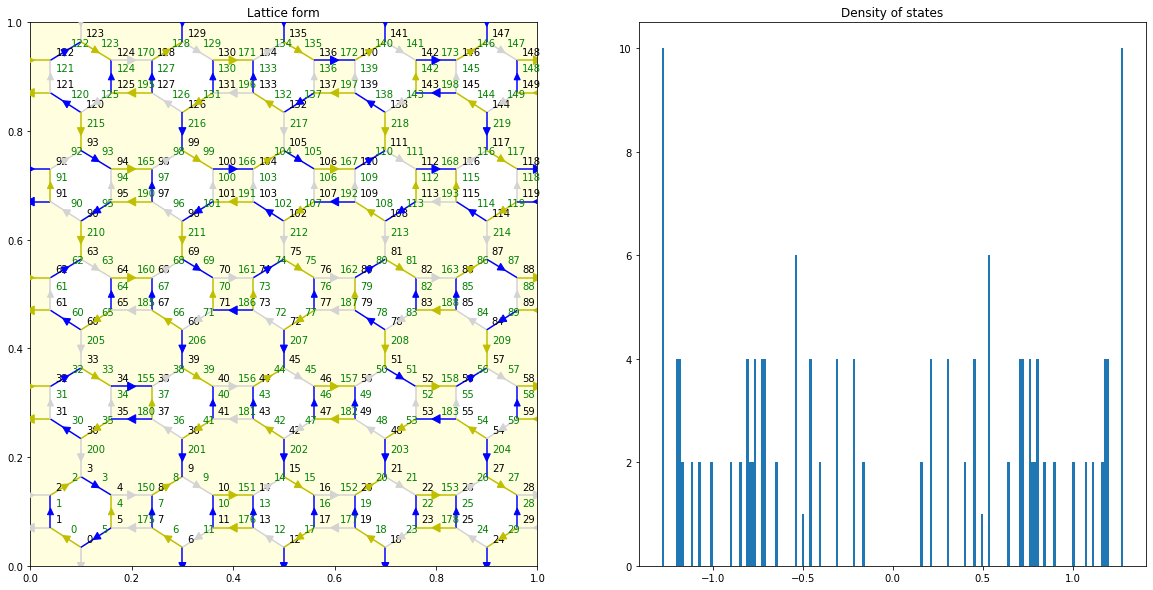

In [9]:


# create the regular quantum system

from koala.hamiltonian import generate_majorana_hamiltonian

# generate the lattice and fluxes
lattice = generate_hex_square_oct(5)
coloring = color_lattice(lattice)
j_vals = np.array([1,1,1])
ujk = np.ones(lattice.n_edges)

# flip a few fluxes
flip_selection = slice(4,150,6)
ujk[flip_selection] = -1

# generate the Hamiltonian and solve
h_big = generate_majorana_hamiltonian(lattice,coloring, ujk, j_vals)
energies1 = la.eigvalsh(h_big)

# plot
fig, ax = plt.subplots(1,2,figsize=(20,10))

# plotting the lattice on plot 1
fluxes = fluxes_from_bonds(lattice,ujk)
c_scheme = pl.peru_friendly_colour_scheme(3)
ax[0].set_title('Lattice form')
pl.plot_edges(lattice, directions = ujk, labels = coloring, color_scheme = c_scheme, ax= ax[0])
pl.plot_vertex_indices(lattice, ax= ax[0])
pl.plot_edge_indices(lattice, ax= ax[0])
pl.plot_plaquettes(lattice,fluxes_to_labels(fluxes),color_scheme=['white','lightyellow'] ,ax= ax[0])

# plot the desnity of states
ax[1].set_title('Density of states')
hist1 = ax[1].hist(energies1,bins = 191)

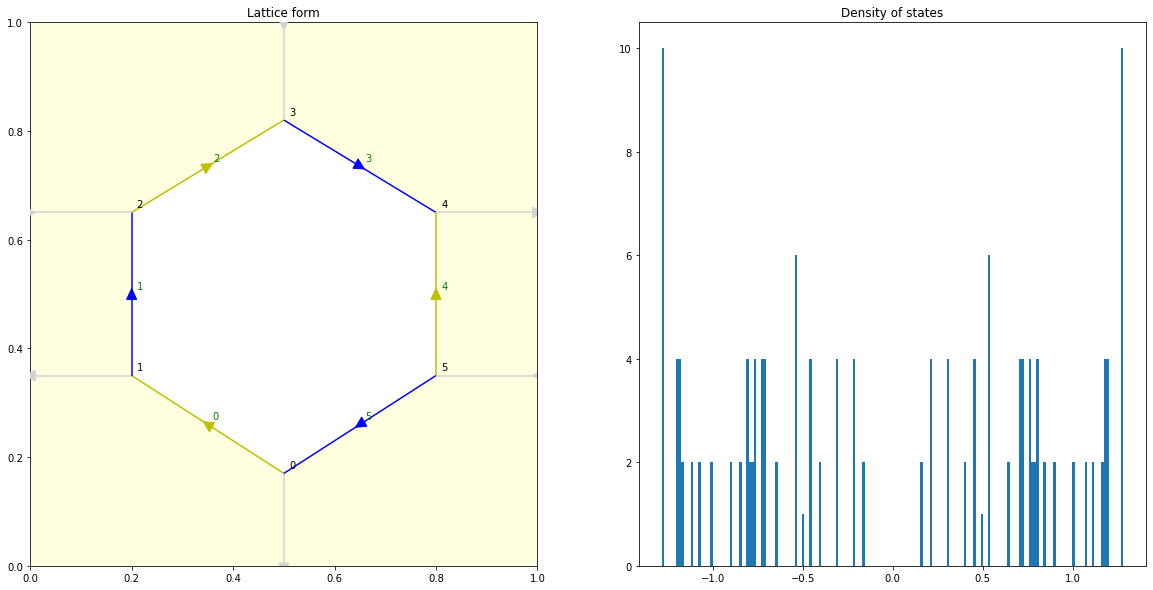

In [10]:
# create the phase space quantum system
n = 5

# generate a minimal lattice unit cell
lattice = generate_hex_square_oct(1)
coloring = color_lattice(lattice)
ujk = np.ones(lattice.n_edges)
j_vals = np.array([1,1,1])

ujk[flip_selection] = -1

# pick your k states
k_values = np.arange(n)*2*np.pi/n
KX,KY = np.meshgrid(k_values,k_values)
kx = KX.flatten()
ky = KY.flatten()

# generate the H(k) bloch Hamiltonian
h_k = ps.k_hamiltonian_generator(lattice,coloring, ujk, j_vals)

# solve the Hamiltonian at every k value
energies2 = np.array([])
for k in zip(kx,ky):
    e = la.eigvalsh(h_k(k))
    energies2 = np.append( energies2,e )

# plot
fig, ax = plt.subplots(1,2,figsize=(20,10))
 
# plot the minimum unit cell
fluxes = fluxes_from_bonds(lattice,ujk)
c_scheme = pl.peru_friendly_colour_scheme(3)
ax[0].set_title('Lattice form')
pl.plot_edges(lattice, directions = ujk, labels = coloring, color_scheme = c_scheme, ax= ax[0])
pl.plot_vertex_indices(lattice, ax= ax[0])
pl.plot_edge_indices(lattice, ax= ax[0])
pl.plot_plaquettes(lattice,fluxes_to_labels(fluxes),color_scheme=['white','lightyellow'] ,ax= ax[0])

# plot the energies
ax[1].set_title('Density of states')
hist2 = ax[1].hist(energies2,bins = 191)

Text(0.5, 1.0, 'Energy difference between the two methods')

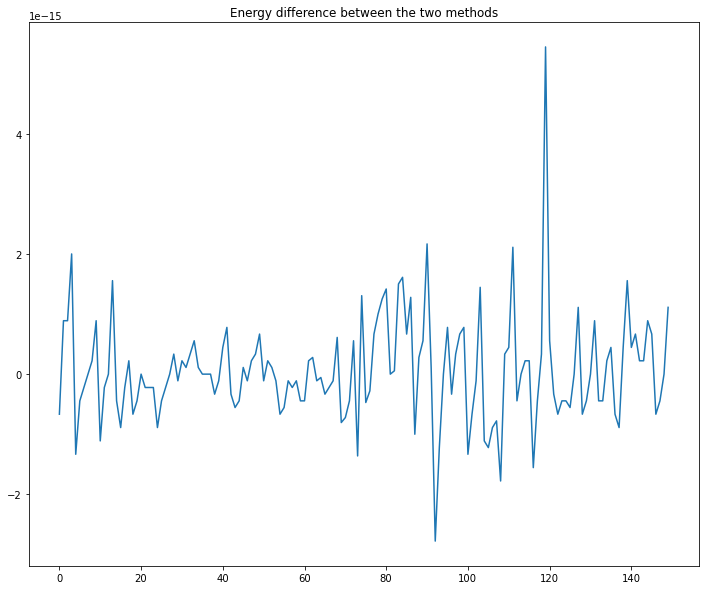

In [11]:
# plot the energy differences between the two systems
fig, ax = plt.subplots(figsize = (12,10))
ax.plot(energies1 - np.sort(energies2))
ax.set_title('Energy difference between the two methods')
